In [35]:
from sklearn.datasets import load_digits
digits=load_digits()
digits.images.shape

(1797, 8, 8)

In [36]:
digits.data.shape

(1797, 64)

In [37]:
digits.target.shape

(1797,)

In [38]:
print('keys of iris_dataset:\n{}'.format(digits.keys()))

keys of iris_dataset:
dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


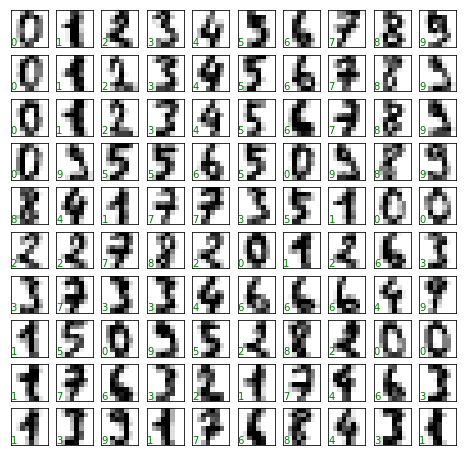

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axes=plt.subplots(10,10,figsize=(8,8),subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary',interpolation='nearest')
    ax.text(0,0.05,str(digits.target[i]),transform=ax.transAxes, color='green')

In [40]:
X=digits.data
X.shape

(1797, 64)

In [41]:
y=digits.target
y.shape

(1797,)

In [42]:
from sklearn.manifold import Isomap
iso=Isomap(n_components=2)
iso.fit(digits.data)
data_projected=iso.transform(digits.data)
data_projected.shape

(1797, 2)

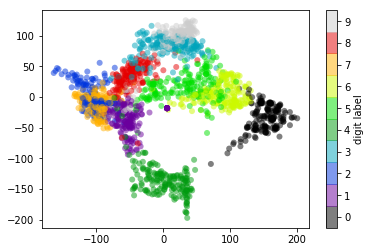

In [43]:
import matplotlib.pyplot as plt
plt.scatter(data_projected[:,0],data_projected[:,1],c=digits.target
        ,edgecolors='none',alpha=0.5,cmap=plt.cm.get_cmap('nipy_spectral',10));    
plt.colorbar(label='digit label',ticks=range(10))
plt.clim(-0.5,9.5)

In [24]:
from sklearn.datasets import load_digits
digits=load_digits()
digits.images.shape

(1797, 8, 8)

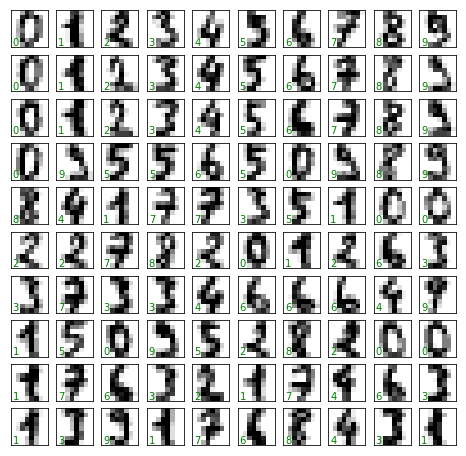

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axes=plt.subplots(10,10,figsize=(8,8),subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05,str(digits.target[i]),transform=ax.transAxes, color='green')

In [27]:
X=digits.data
X.shape

(1797, 64)

In [28]:
y=digits.target
y.shape

(1797,)

In [29]:
from sklearn.manifold import Isomap
iso=Isomap(n_components=2)
iso.fit(digits.data)
data_projected=iso.transform(digits.data)
data_projected.shape

(1797, 2)

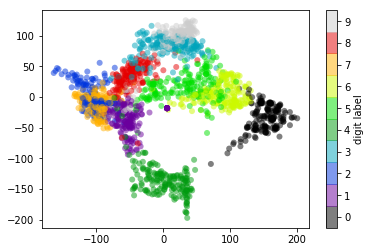

In [44]:
import matplotlib.pyplot as plt
plt.scatter(data_projected[:,0],data_projected[:,1],c=digits.target
        ,edgecolors='none',alpha=0.5,cmap=plt.cm.get_cmap('nipy_spectral',10));    
plt.colorbar(label='digit label',ticks=range(10))
plt.clim(-0.5,9.5)

In [45]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,random_state=0)

In [46]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(Xtrain, ytrain)
y_model=model.predict(Xtest)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_model)

0.8333333333333334

Text(91.68,0.5,'true value')

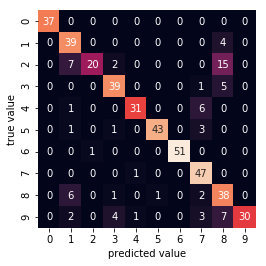

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat=confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

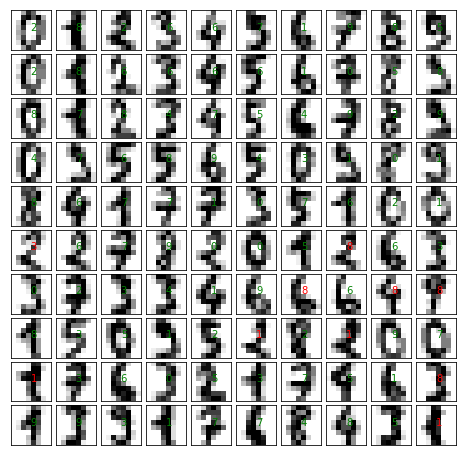

In [49]:
flg, axes=plt.subplots(10,10, figsize=(8,8),
                       subplot_kw={'xticks':[],'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.5, 0.5,str(y_model[i]),transform=ax.transAxes,color='green'if(ytest[i]==y_model[i])else 'red')